In [31]:
!pip install shap  # install shap library if needed
!pip install -U scikit-learn scipy matplotlib
!pip install xgboost
!pip install seaborn

In [50]:
import pandas as pd
import glob

sentiment_data = []  # list to collect per-country-year data

# Iterate through files 2018-2024 (assuming folder structure comments_YEAR_sentiment)
for year in range(2018, 2025):
    file_pattern = f"comments_{year}_sentiment/*_comments.csv"
    print(file_pattern)
    for filepath in glob.glob(file_pattern):
        # Extract country name from filename (assuming format 'YEAR_Country_comments.csv')
        filename = filepath.split('/')[-1]
        # e.g., "2018_United Kingdom_comments.csv" -> country = "United Kingdom"
        country = filename.replace(f"{year}_", "").replace("_comments.csv", "")
        df = pd.read_csv(filepath)

        sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}
        df['sentiment_label_value'] = df['sentiment'].map(sentiment_map)
        df['weighted_score'] = df['sentiment_label_value'] * df['sentiment_score']
        avg_sentiment = df['weighted_score'].mean()
        
        # Map sentiment labels to numeric values, Compute average sentiment and total comments for this country-year
        #sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}
        #df['sentiment_score'] = df['sentiment'].map(sentiment_map)
        #avg_sentiment = df['sentiment_score'].mean()

        
        comment_count = len(df)
        sentiment_data.append({
            "year": year,
            "country": country,
            "avg_sentiment": avg_sentiment,
            "comment_count": comment_count
        })

# Create a DataFrame of sentiment features per country-year
sentiment_df = pd.DataFrame(sentiment_data)
print(sentiment_df.head())


comments_2018_sentiment/*_comments.csv
comments_2019_sentiment/*_comments.csv
comments_2020_sentiment/*_comments.csv
comments_2021_sentiment/*_comments.csv
comments_2022_sentiment/*_comments.csv
comments_2023_sentiment/*_comments.csv
comments_2024_sentiment/*_comments.csv
   year  country  avg_sentiment  comment_count
0  2018  Ukraine       0.392893            853
1  2018   France       0.455579           2550
2  2018    Spain       0.340400           4941
3  2018   Norway       0.222571           2207
4  2018   Cyprus       0.408271           1842


In [51]:
# Load historical data
placements_df = pd.read_csv("historical_placements.csv")   # columns: country, avg_placement
wins_df = pd.read_csv("historical_wins.csv")               # columns: country, num_wins

# Merge historical features into sentiment_df , average_Placement is with big P 
data_df = sentiment_df.merge(placements_df, on="country", how="left")
data_df = data_df.merge(wins_df, on="country", how="left")
print(data_df)


     year   country  avg_sentiment  comment_count  average_Placement  wins
0    2018   Ukraine       0.392893            853               7.67   3.0
1    2018    France       0.455579           2550              16.25   5.0
2    2018     Spain       0.340400           4941              18.75   2.0
3    2018    Norway       0.222571           2207              12.24   3.0
4    2018    Cyprus       0.408271           1842              15.17   NaN
..    ...       ...            ...            ...                ...   ...
148  2024   Georgia       0.554339           3920              13.50   NaN
149  2024    Sweden       0.214924           2528               8.50   7.0
150  2024     Italy       0.523448           1296               6.85   3.0
151  2024  Portugal       0.476686           1427              14.11   1.0
152  2024    France       0.594964           3168              16.25   5.0

[153 rows x 6 columns]


In [52]:
# Manually specify winners for each year (country names must match those in data_df)
winners = {
    2018: "Israel",      # e.g., Israel won in 2018
    2019: "Netherlands", # e.g., Netherlands won in 2019
    2021: "Italy",
    2022: "Ukraine",
    2023: "Sweden",
    2024: "Switzerland"       
}

# Add is_winner column
data_df['is_winner'] = data_df.apply(
    lambda row: 1 if winners.get(row['year']) == row['country'] else 0,
    axis=1
)
print(data_df)

# Drop non-feature columns
X = data_df.drop(columns=["country", "year", "is_winner"])
y = data_df["is_winner"]

print("Feature columns:", list(X.columns))


     year   country  avg_sentiment  comment_count  average_Placement  wins  \
0    2018   Ukraine       0.392893            853               7.67   3.0   
1    2018    France       0.455579           2550              16.25   5.0   
2    2018     Spain       0.340400           4941              18.75   2.0   
3    2018    Norway       0.222571           2207              12.24   3.0   
4    2018    Cyprus       0.408271           1842              15.17   NaN   
..    ...       ...            ...            ...                ...   ...   
148  2024   Georgia       0.554339           3920              13.50   NaN   
149  2024    Sweden       0.214924           2528               8.50   7.0   
150  2024     Italy       0.523448           1296               6.85   3.0   
151  2024  Portugal       0.476686           1427              14.11   1.0   
152  2024    France       0.594964           3168              16.25   5.0   

     is_winner  
0            0  
1            0  
2           

In [4]:
!pip install -U scikit-learn scipy matplotlib
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 23.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 73.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 87.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


In [47]:
#Test train XGboost

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, # stratify=y
)


In [48]:
from xgboost import XGBClassifier

model = XGBClassifier(
    scale_pos_weight=(len(y_train) / sum(y_train)),
    objective="binary:logistic",  # logistic regression for binary classification:contentReference[oaicite:4]{index=4}
    n_estimators=100,    # number of trees (boosting rounds)
    max_depth=3,         # maximum tree depth for base learners
    learning_rate=0.1,   # step size shrinkage
    random_state=42,
    eval_metric="logloss"         # evaluation metric for binary classification
)
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1-score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, zero_division=1)  # zero_division=1 to handle cases with no positive preds
print(f"Test Accuracy: {acc:.3f}")
print(f"Test F1-score: {f1:.3f}")

# Detailed classification report
print(classification_report(y_test, y_pred, digits=3))


Test Accuracy: 0.962
Test F1-score: 0.667
              precision    recall  f1-score   support

           0      1.000     0.960     0.980        25
           1      0.500     1.000     0.667         1

    accuracy                          0.962        26
   macro avg      0.750     0.980     0.823        26
weighted avg      0.981     0.962     0.968        26



In [9]:
feature_names = X.columns
importances = model.feature_importances_  # array of importance scores
feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)
print(feat_imp_df)

# Save feature importances to CSV
feat_imp_df.to_csv("feature_importances.csv", index=False)

             feature  importance
1      comment_count    0.685292
3               wins    0.292961
2  average_Placement    0.012227
0      avg_sentiment    0.009520


In [26]:
import shap
import numpy as np
import os

# Create a TreeExplainer for the XGBoost model
explainer = shap.TreeExplainer(model)
# Calculate SHAP values for the training set (as representative of feature influence)
shap_values = explainer.shap_values(X_train)

# Compute mean absolute SHAP value for each feature (global importance)
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
shap_importance_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)
print(shap_importance_df)


             feature  mean_abs_shap
1      comment_count       2.808243
3               wins       2.072667
0      avg_sentiment       0.726736
2  average_Placement       0.443744


In [13]:
# Save test set predictions to CSV
pred_df = pd.DataFrame({
    "year": X_test.index.map(lambda i: data_df.loc[i, "year"]),
    "country": X_test.index.map(lambda i: data_df.loc[i, "country"]),
    "actual_winner": y_test.values,
    "predicted_winner": y_pred
})
pred_df.to_csv("predictions.csv", index=False)


In [ ]:
# See how many comments did the winning countries have , compared to to the mean comments 

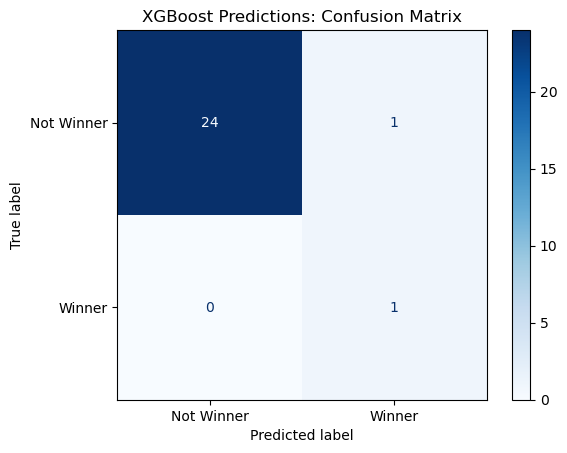

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Winner", "Winner"])
disp.plot(cmap="Blues")
plt.title("XGBoost Predictions: Confusion Matrix")
plt.show()


/tmp/ipykernel_640/3580893022.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


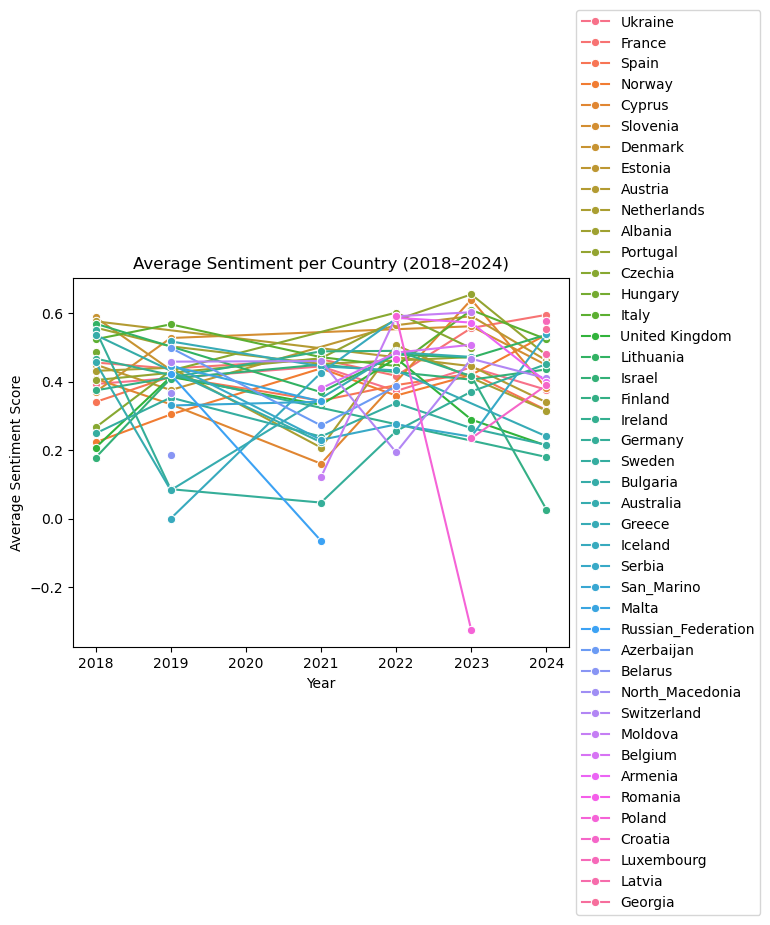

In [44]:
sns.lineplot(data=data_df, x='year', y='avg_sentiment', hue='country', marker="o")
plt.title("Average Sentiment per Country (2018–2024)")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Year")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


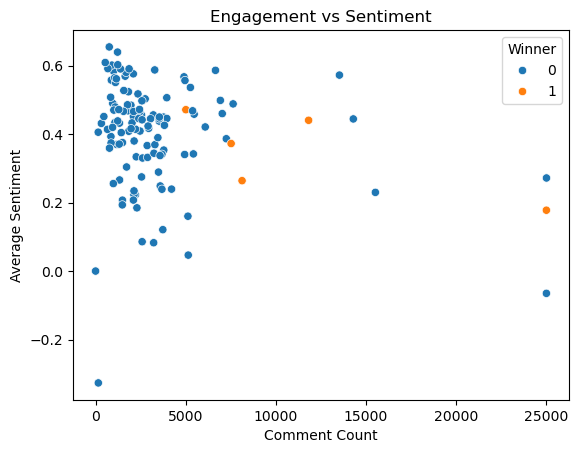

In [21]:
sns.scatterplot(data=data_df, x='comment_count', y='avg_sentiment', hue='is_winner')
plt.title("Engagement vs Sentiment")
plt.xlabel("Comment Count")
plt.ylabel("Average Sentiment")
plt.legend(title="Winner")
plt.show()


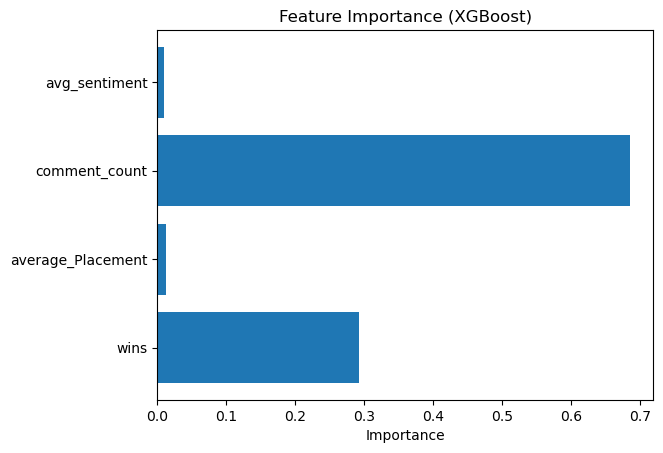

In [22]:
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


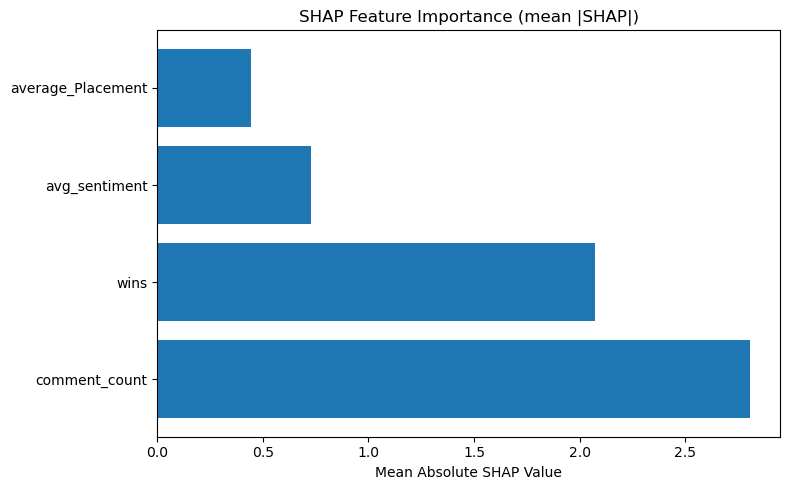

In [53]:
# Plot SHAP feature importance
plt.figure(figsize=(8, 5))
plt.barh(shap_importance_df["feature"], shap_importance_df["mean_abs_shap"])
plt.title("SHAP Feature Importance (mean |SHAP|)")
plt.xlabel("Mean Absolute SHAP Value")
plt.tight_layout()
plt.show()

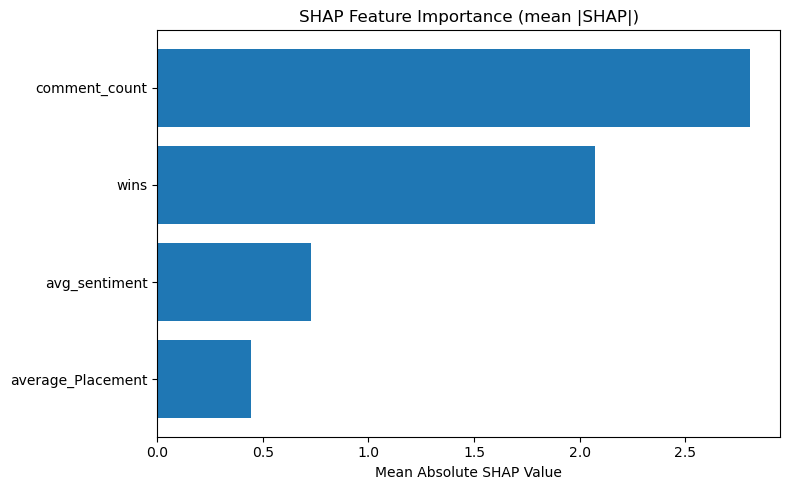

In [54]:
# Create the same SHAP importance DataFrame as in your previous step
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
shap_importance_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=True)  # ascending=True for horizontal bar chart

# Plot SHAP feature importance
plt.figure(figsize=(8, 5))
plt.barh(shap_importance_df["feature"], shap_importance_df["mean_abs_shap"])
plt.title("SHAP Feature Importance (mean |SHAP|)")
plt.xlabel("Mean Absolute SHAP Value")
plt.tight_layout()
plt.show()